# Combining and reducing the ASAS-SN data



In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from astropy.table import Table, vstack, unique
from pathlib import Path
from astropy.io import ascii

# output table
#t = Table(data=None,names=('MJD','gmag','gmag_err','obs'),dtype=('f','f','f','str'))
t=Table()
for filename in Path('./').rglob('light_curve*.csv'):
    print(filename)
    tin = ascii.read(filename)
    # remove rows where magerr is 99.99       
    tin_goodmag = tin[(tin['mag_err']<90)]

    # identify rows with 'mag' having the > symbol in them and remove them
    
    t = vstack([t,tin_goodmag])

print(t)
# remove duplicates
t = unique(t,'HJD')
t.sort('HJD')
t['MJD'] = t['HJD']-2400000.5


light_curve_6663abac-21e9-4545-95c3-3b3691a3d170.csv
light_curve_2e1746e6-8c4e-4a68-9d60-5a0d332b67a4.csv
light_curve_bb61d0ed-b07f-4e87-8881-769866dd896e.csv
light_curve_d044e51e-88c8-43de-8f6f-89bef3802688.csv
light_curve_03ce0bc8-42ef-48f4-a463-ce657f0bf77a.csv
light_curve_4b52f413-9000-448b-8399-20d88b80f7dc.csv
light_curve_67853e65-dcfd-431b-b351-e4d1083edf3c.csv
light_curve_b4508c12-b04a-467c-9e20-6881885cf0fb.csv
     HJD           UT Date       Camera FWHM ... flux(mJy) flux_err Filter
------------- ------------------ ------ ---- ... --------- -------- ------
2458854.57776 2020-01-06.0745729     bE 1.48 ...     5.002    0.194      g
2458854.57904 2020-01-06.0758459     bE 1.45 ...      5.52    0.201      g
 2458854.5803 2020-01-06.0771099     bE  1.5 ...     4.943    0.205      g
2458854.76098 2020-01-06.2577958     bq  1.5 ...     5.154    0.224      g
2458854.76221 2020-01-06.2590214     bq 1.49 ...      5.04    0.199      g
2458854.76342 2020-01-06.2602375     bq 1.51 ...   

In [3]:
tin.show_in_notebook()

idx,HJD,UT Date,Camera,FWHM,Limit,mag,mag_err,flux(mJy),flux_err,Filter
0,2458730.59219,2019-09-04.0932917,bm,1.48,16.738,14.229,0.022,7.387,0.148,g
1,2458730.5934,2019-09-04.0945018,bm,1.51,16.724,14.203,0.021,7.564,0.149,g
2,2458730.5946,2019-09-04.0957070,bm,1.52,16.76,14.234,0.021,7.349,0.144,g
3,2458730.8815,2019-09-04.3825885,bi,1.43,16.747,14.211,0.021,7.507,0.146,g
4,2458730.88271,2019-09-04.3838,bi,1.39,16.741,14.195,0.021,7.627,0.147,g
5,2458730.88393,2019-09-04.3850122,bi,1.43,16.739,14.231,0.022,7.373,0.147,g
6,2458733.58648,2019-09-07.0874123,bm,1.54,16.713,14.196,0.021,7.616,0.151,g
7,2458733.58768,2019-09-07.0886204,bm,1.52,16.77,14.211,0.021,7.508,0.143,g
8,2458733.58892,2019-09-07.0898601,bm,1.54,16.741,14.223,0.021,7.429,0.147,g
9,2458733.88575,2019-09-07.3866737,bi,1.53,16.032,14.273,0.043,7.097,0.281,g


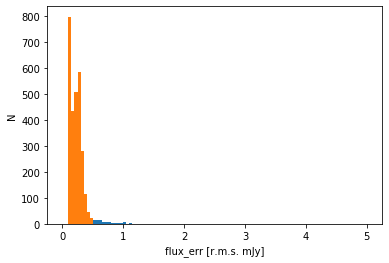

In [4]:

plt.hist(t['flux_err'],bins=100, range=(0,5));
plt.xlabel('flux_err [r.m.s. mJy]')
plt.ylabel('N')

# reject points with noise > 0.5 mJy
noise_rej = 0.5

s = t[t['flux_err']<noise_rej]

plt.hist(s['flux_err'],bins=100, range=(0,5));


Text(0, 0.5, 'Flux [mJy]')

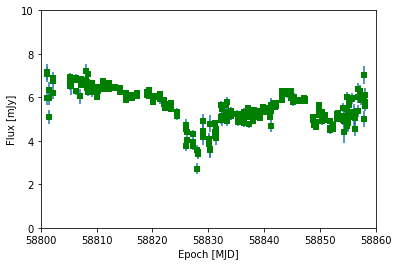

In [5]:
plt.errorbar(s['MJD'],s['flux(mJy)'],yerr=s['flux_err'],marker='s',
                 mec='green', ms=2, mew=4, fmt='.')
plt.xlim(58800,58860)
plt.ylim(0,10)
plt.xlabel('Epoch [MJD]')
plt.ylabel('Flux [mJy]')

# continuum points in the light curve
##con = s[s['MJD']<58780]
##mean_flux = con['flux(mJy)'].mean()

##plt.hlines(mean_flux,58800,58830);

In [6]:
t.write('asas.ecsv', format='ascii.ecsv', overwrite=True)